

## **COMP6685 Deep Learning Coursework A1**


Individual (50% of total mark)


**TASK:**	You are required to develop a phyton code with appropriate comments and answer questions.

**Description**: Create a code using this temlate to train a Convolutional Neural Network (CNN) on the fashion MNIST dataset available at https://keras.io/api/datasets/fashion_mnist/ . 

Fashion MNIST is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

The dataset should be imported in the code and one sample image should be visualised before applying the model.

Define a CNN and comment the chosen parameters of the network. Apply a regularization method (L1, L2 or L1L2). Divide the dataset into training, validation and test set. Obtain the accuracy on the validation set and plot the final results using the data from the test set. Comment your lines of code appropriately to explain your solution.

Enhance the model's performance to obtain the best or optimal validation accuracy. Further questions about final remarks on the results will be answered on the markdown defined in the template.

---
---

Note: This is only a template. You can add more code/text cells if necessary.

In [5]:
## import data from at 
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [6]:
labels = [
    {0, "T-shirt/top"}, 
    {1, "Trouser"}, 
    {2, "Pullover"},
    {3,"Dress"},
    {4, "Coat"},
    {5, "Sandal"},
    {6, "Shirt"},
    {7, "Sneaker"},
    {8, "Bag"},
    {9, "Ankle boot"}
]

# PDF paper https://bhu.ac.in/research_pub/jsr/Volumes/JSR_64_02_2020/51.pdf

Import the dataset and divide it appropriately into sets for cross-validation. **(10 marks)**

---

In [9]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /=  255 
test_images /= 255

# Reshape images to fit the model input requirement
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# One-hot encode the labels
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

*your answer here*

Visualise a random sample image of the dataset. **(5 marks)**

---

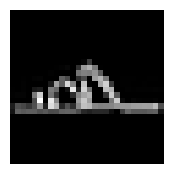

In [12]:
# Visualize one random sample from the dataset
def visualize_sample():
    plt.figure(figsize=(2,2))
    random_index = np.random.choice(train_images.shape[0])
    plt.imshow(train_images[random_index].reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.show()
    
visualize_sample()


Define your CNN model. Specify the network and training parameters and comment them. **(10 marks)**

---

In [ ]:
class CNN: 
    @staticmethod
    def create(shape, classes, optimizer='adam'):
        
        model = keras.Sequential()
        # Convolutional layer with L2 regularization        
        model.add(layers.Conv2D(32, kernel_size=(3, 3), input_shape=shape, kernel_regularizer=keras.regularizers.l2(0.001)))
        model.add(layers.Activation('relu'))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        
        # Another convolutional layer
        model.add(layers.Conv2D(64, kernel_size=(3, 3), kernel_regularizer=keras.regularizers.l2(0.001)))
        model.add(layers.Activation('relu'))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))
        
        # Flatten the output of the conv layers to feed into the dense layer
        model.add(layers.Flatten())
        model.add(layers.Dense(128))
        model.add(layers.Activation("relu"))
        
        # Output layer with softmax for multi-class classification
        model.add(layers.Dense(classes))
        model.add(layers.Activation("softmax"))
        
        model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
        return model

# your code here



Train the CNN model using k-fold cross-validation. **(10 marks)**

---

In [40]:
# your code here
# Prepare k-fold cross-validation
FOLDS = 5 # The number of folds to use for k-fold cross-validation
EPOCHS = 20 # The number of epochs to train for each fold
VERBOSE = 2 # The verbosity level for the model
OPTIMIZER = keras.optimizers.legacy.Adam()
VALIDATION_SPLIT = 0.2 # The proportion of the training dataset to set aside as the validation set

N_CLASSES = 10
IMG_ROWS, IMG_COLS = 28, 28
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)

kfold = KFold(n_splits=FOLDS, shuffle=True)

fold_num = 1
acc_per_fold = []
loss_per_fold = []
histories = []

for train, test in kfold.split(train_images, train_labels):
    # Create model
    model = CNN.create(shape=INPUT_SHAPE, classes=N_CLASSES, optimizer=OPTIMIZER)
    
    # Fit model
    history = model.fit(train_images[train], train_labels[train], epochs=EPOCHS, validation_data=(train_images[test], train_labels[test]), verbose=VERBOSE)
    histories.append(history)

    # Generate generalization metrics
    scores = model.evaluate(train_images[test], train_labels[test], verbose=0)
    print(f'Score for fold {fold_num}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    fold_num += 1


Epoch 1/20
1500/1500 - 13s - loss: 0.5252 - accuracy: 0.8245 - val_loss: 0.4153 - val_accuracy: 0.8679 - 13s/epoch - 9ms/step
Epoch 2/20
1500/1500 - 12s - loss: 0.3652 - accuracy: 0.8802 - val_loss: 0.3462 - val_accuracy: 0.8905 - 12s/epoch - 8ms/step
Epoch 3/20
1500/1500 - 13s - loss: 0.3274 - accuracy: 0.8914 - val_loss: 0.3371 - val_accuracy: 0.8915 - 13s/epoch - 8ms/step
Epoch 4/20
1500/1500 - 12s - loss: 0.2997 - accuracy: 0.9008 - val_loss: 0.3164 - val_accuracy: 0.8972 - 12s/epoch - 8ms/step
Epoch 5/20
1500/1500 - 12s - loss: 0.2815 - accuracy: 0.9072 - val_loss: 0.3091 - val_accuracy: 0.9013 - 12s/epoch - 8ms/step
Epoch 6/20
1500/1500 - 13s - loss: 0.2632 - accuracy: 0.9149 - val_loss: 0.3013 - val_accuracy: 0.9028 - 13s/epoch - 9ms/step
Epoch 7/20
1500/1500 - 13s - loss: 0.2535 - accuracy: 0.9177 - val_loss: 0.2893 - val_accuracy: 0.9078 - 13s/epoch - 9ms/step
Epoch 8/20
1500/1500 - 13s - loss: 0.2389 - accuracy: 0.9241 - val_loss: 0.2887 - val_accuracy: 0.9072 - 13s/epoch - 8

Evaluate your model in cross-validation. Calculate and print the loss and accuracy scores in each fold. Print the average cross-validation accuracy and loss your network achieved (in all folds). **(15 marks)**


In [35]:
# your code here
# Print the average scores
print('----------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('----------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('----------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('----------------------------------------------------------------')


----------------------------------------------------------------
Score per fold
----------------------------------------------------------------
> Fold 1 - Loss: 0.4106912314891815 - Accuracy: 85.958331823349%
----------------------------------------------------------------
> Fold 2 - Loss: 0.3769662380218506 - Accuracy: 87.65000104904175%
----------------------------------------------------------------
> Fold 3 - Loss: 0.35676684975624084 - Accuracy: 87.93333172798157%
----------------------------------------------------------------
> Fold 4 - Loss: 0.38720235228538513 - Accuracy: 87.05833554267883%
----------------------------------------------------------------
> Fold 5 - Loss: 0.3773060441017151 - Accuracy: 87.41666674613953%
----------------------------------------------------------------
Average scores for all folds:
> Accuracy: 87.20333337783813 (+- 0.6854157816424508)
> Loss: 0.3817865431308746
----------------------------------------------------------------


*your answer here*

Plot the final results (accuracy/loss) on the test set in each fold. **(10 marks)**

---

{'loss': [0.463677316904068], 'accuracy': [0.843458354473114], 'val_loss': [0.37730586528778076], 'val_accuracy': [0.8741666674613953]}


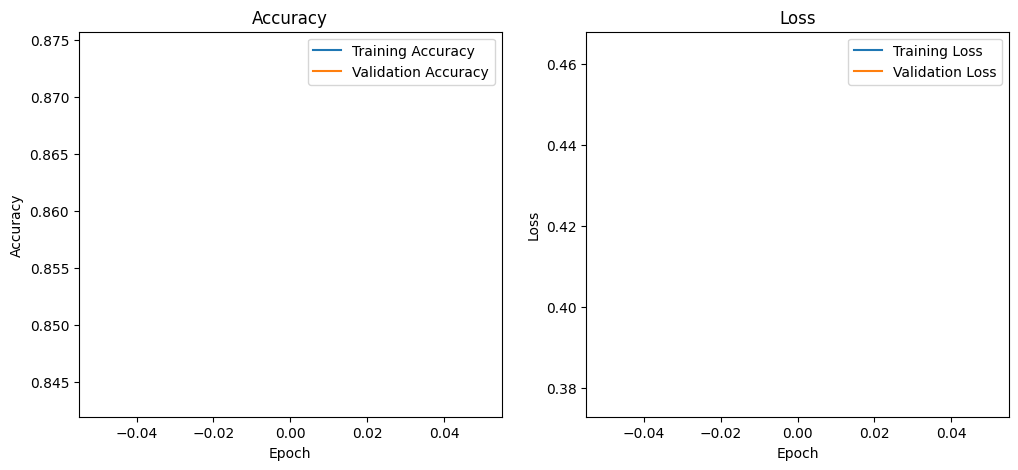

In [34]:
# Plot the training and validation accuracy and loss for the last fold
print(histories[-1].history)
plt.figure(figsize=(12, 5))

# Plotting accuracy for the last fold
plt.subplot(1, 2, 1)
plt.plot(histories[-1].history['accuracy'], label='Training Accuracy')
plt.plot(histories[-1].history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss for the last fold
plt.subplot(1, 2, 2)
plt.plot(histories[-1].history['loss'], label='Training Loss')
plt.plot(histories[-1].history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


Additional questions:


*   Describe whether you found any differences in the network’s accuracy when applying regularisation compared to not applying it. If there were differences, which regularisation did you use? If no differences were found, what could be the reason? **(10 marks)**

*your answer here*

*   Write your conclusions about the results achieved with your model on the fashion MNIST dataset and ideas to improve these results/performance further. **(10 marks)**

*your answer here*

---



Additional remarks:

*   Code outline appropriately commented. **(10 marks)**
*   Code running without errors. **(10 marks)**

---

